## Importing necessary librarbies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding the Data

In [2]:
# Reading the dataset
loan = pd.read_csv('loan.csv', low_memory=False)

In [3]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.shape

(39717, 111)

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

In [6]:
# Validating count of missing values for each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# Calculate the percentage of missing values in each column
val_missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
print(val_missing)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [8]:
# validating the  columns with more than 50% of missing values
col_val_missing = list(val_missing[val_missing >= 50].index)
len(col_val_missing)

57

In [9]:
# Lets drop the columns with more than 50% of missing values
loan = loan.drop(col_val_missing,axis=1)
loan.shape

(39717, 54)

In [10]:
# summarize number of missing values
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [11]:
# Let's see  columns that have % of missing values > 0
round(loan.isnull().sum()/len(loan)*100, 2).loc[lambda x : x > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.59
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [12]:
#Validating the number of unique values in above columns
print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique desc : %d"  % len(loan.desc.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique desc : 26527
unique title : 19616
unique revol_util : 1090
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


In [13]:
#lets validate above categorical values 12> except desc as it is not categorical
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [14]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [15]:
loan.tax_liens.unique()

array([ 0., nan])

In [16]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [17]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [18]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [19]:
#dropping the columns as these are not required for data analaysis
loan = loan.drop(columns=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis=1)

In [20]:
loan.shape

(39717, 51)

In [21]:
# Again validate the % missing values
round(loan.isnull().sum()/len(loan)*100, 2).loc[lambda x : x > 0]

emp_title                6.19
emp_length               2.71
desc                    32.59
title                    0.03
revol_util               0.13
last_pymnt_d             0.18
last_credit_pull_d       0.01
pub_rec_bankruptcies     1.75
dtype: float64

In [22]:
# lets remove remaining missing values/NaN/null values from colums
loan.dropna(subset=['emp_title','emp_length','title','revol_util','last_pymnt_d','last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)

In [23]:
loan.shape

(36433, 51)

In [24]:
# lets summarize the missing values again
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   0.00
emp_length                  0.00
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
pymnt_plan                  0.00
url                         0.00
desc                       33.01
purpose                     0.00
title                       0.00
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
open_acc                    0.00
pub_rec                     0.00
revol_bal 

In [25]:
# dropping the list of columns which are irrelevant for data analysis
loan = loan.drop(columns=['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',], axis=1)

In [26]:
loan.shape

(36433, 39)

In [27]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36433 non-null  int64  
 1   term                     36433 non-null  object 
 2   int_rate                 36433 non-null  object 
 3   installment              36433 non-null  float64
 4   grade                    36433 non-null  object 
 5   sub_grade                36433 non-null  object 
 6   emp_title                36433 non-null  object 
 7   emp_length               36433 non-null  object 
 8   home_ownership           36433 non-null  object 
 9   annual_inc               36433 non-null  float64
 10  verification_status      36433 non-null  object 
 11  issue_d                  36433 non-null  object 
 12  loan_status              36433 non-null  object 
 13  desc                     24406 non-null  object 
 14  purpose                  36

In [28]:
#removing customer behaviour variables as these were not available intiially.
cust_behav_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

print(cust_behav_var)

['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']


In [29]:
#removing the behaviour variables from analysis
loan = loan.drop(cust_behav_var, axis=1)

#lets relabel the values if customer has defaulted or not to binary for better calucalation or using it as indicator

In [30]:
loan['loan_status'] = loan['loan_status'].astype('category')
loan['loan_status'].value_counts()

loan_status
Fully Paid     30424
Charged Off     4943
Current         1066
Name: count, dtype: int64

In [31]:
# fully paid or charged-off
loan = loan[loan['loan_status'] != 'Current']
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# Converting loan_status to integer type
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarizing the values
loan['loan_status'].value_counts()

loan_status
0    30424
1     4943
Name: count, dtype: int64

In [32]:
# Coverts int_rate into float data type
loan['int_rate'] = loan.int_rate.str.replace('%','').astype(float)

In [33]:
# Coverts emp_length into float data type
loan['emp_length'] = loan.emp_length.str.replace('years','').str.replace('year','').str.replace('+','').str.replace('< 1','0.5').astype(float)

## Data Analysis

In [34]:
# Validate the overall default rate
loan_status_percentage = np.mean(loan['loan_status']) * 100
print(f"Percentage of loan status 1 (e.g., Charged Off): {round(loan_status_percentage, 2)}%")

Percentage of loan status 1 (e.g., Charged Off): 13.98%


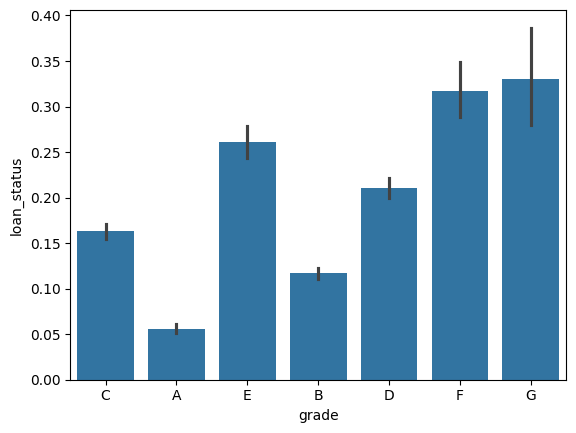

In [35]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=loan)
plt.show()

In [36]:
# lets define a function to plot loan_status across categorical variables
def plot_loan(loan_var):
    sns.barplot(x=loan_var, y='loan_status', data=loan)
    plt.show()

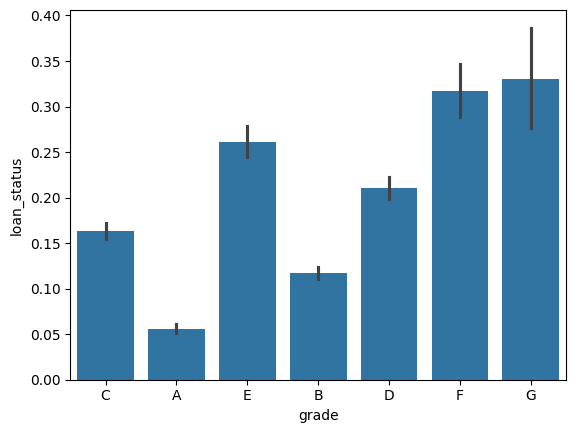

In [37]:
# compare default rates across grade of loan
plot_loan('grade')

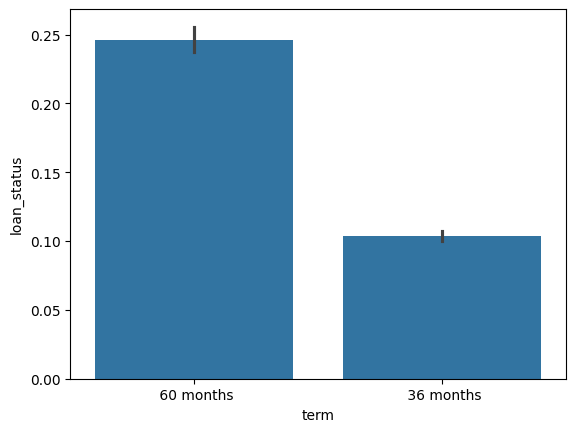

In [38]:
# term: 60 months loans default more than 36 months loans
plot_loan('term')

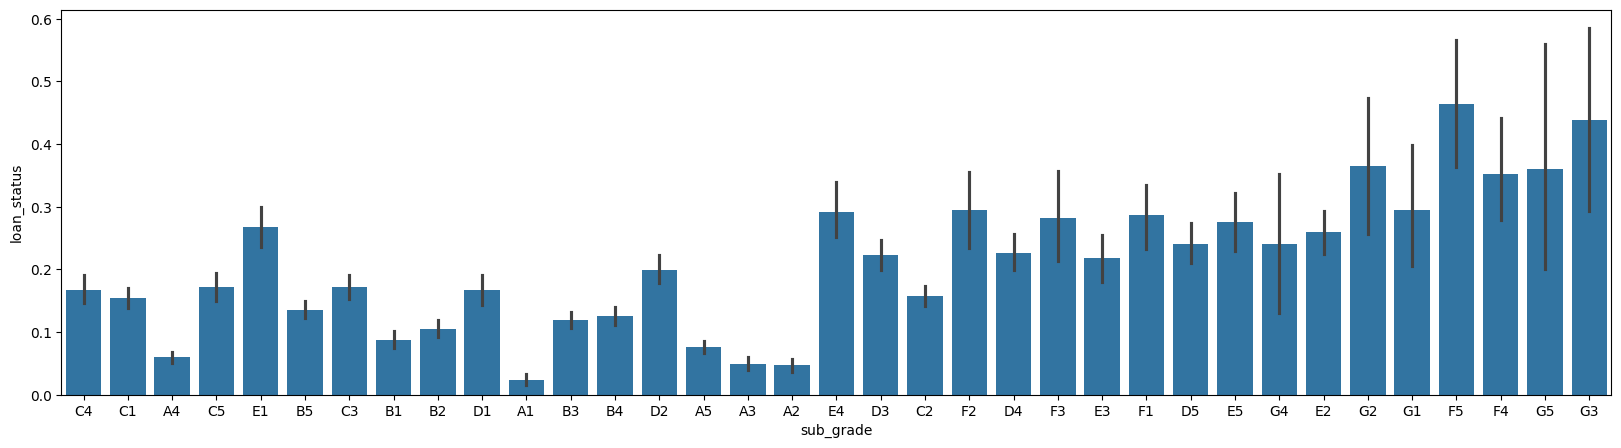

In [39]:
# sub-grade: - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(20, 5))
plot_loan('sub_grade')

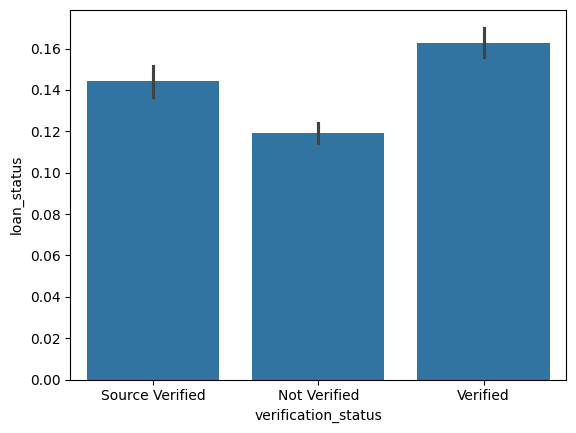

In [40]:
# verification_status: surprisingly, verified loans default more than not verified
plot_loan('verification_status')

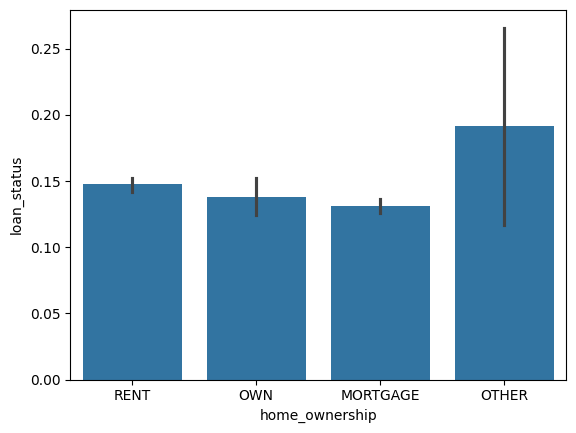

In [41]:
# home ownership: not a great discriminator
plot_loan('home_ownership')

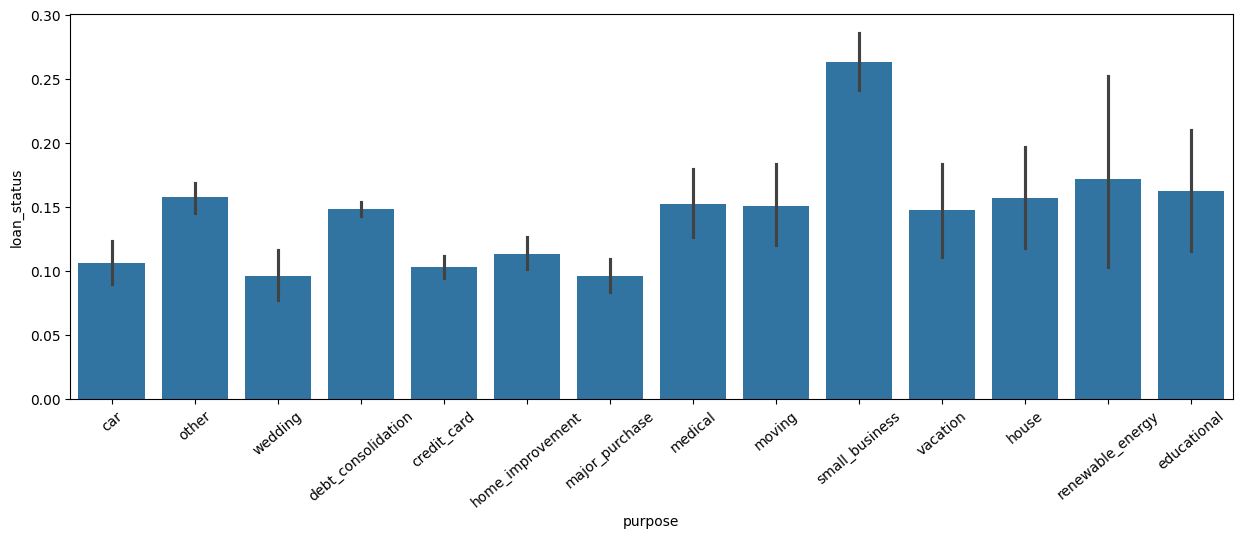

In [42]:
# purpose: small business loans default the most, then renewable energy and education
plt.figure(figsize=(15, 5))
# Rotating the labels on X-axis to avoid overlapping
plt.xticks(rotation=40) 
plot_loan('purpose')

In [43]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [44]:
# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

In [45]:
# let's first observe the number of loans granted across years
loan.groupby('year').year.count()

year
2007        6
2008     1053
2009     4423
2010    10795
2011    19090
Name: year, dtype: int64

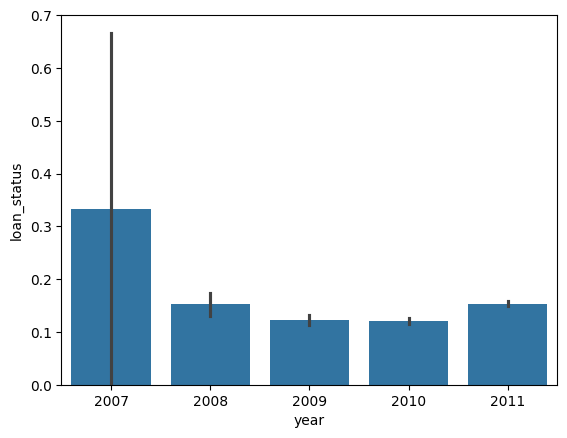

In [46]:
plot_loan('year')

In [47]:
# number of loans across months
loan.groupby('month').month.count()

month
1     2048
2     2020
3     2395
4     2669
5     2745
6     2977
7     3115
8     3188
9     3276
10    3436
11    3678
12    3820
Name: month, dtype: int64

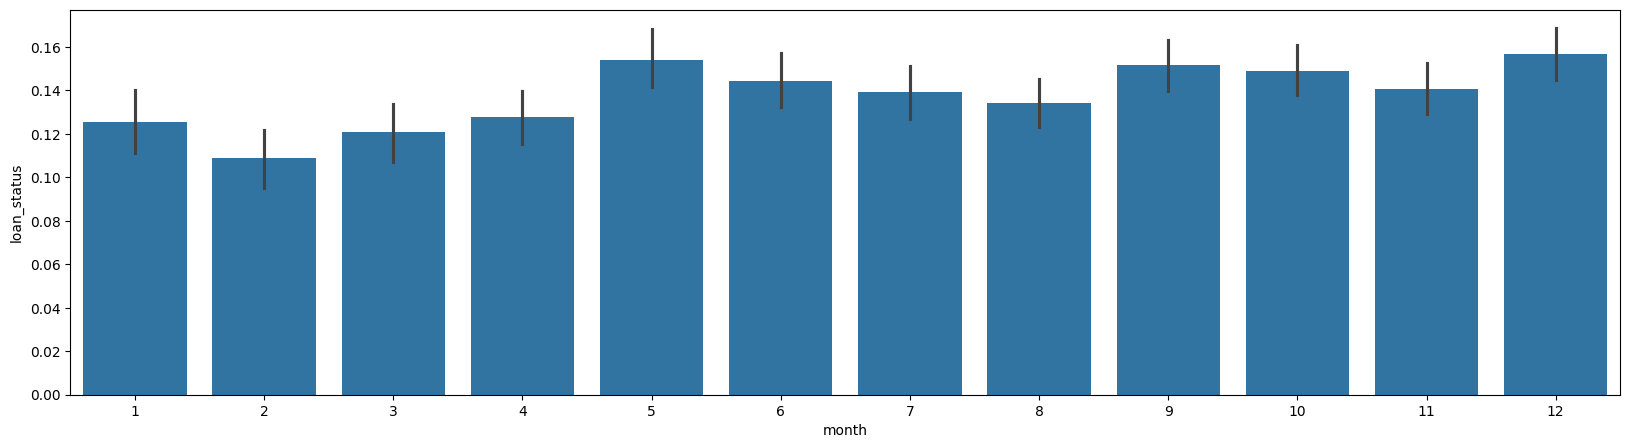

In [48]:
# comparing default rates across months: not much variation across months
plt.figure(figsize=(20, 5))
plot_loan('month')

/var/folders/8t/z_vd0gl96pbgn8h4k5w5_0t40000gn/T/ipykernel_4791/3390137315.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan['loan_amnt'])


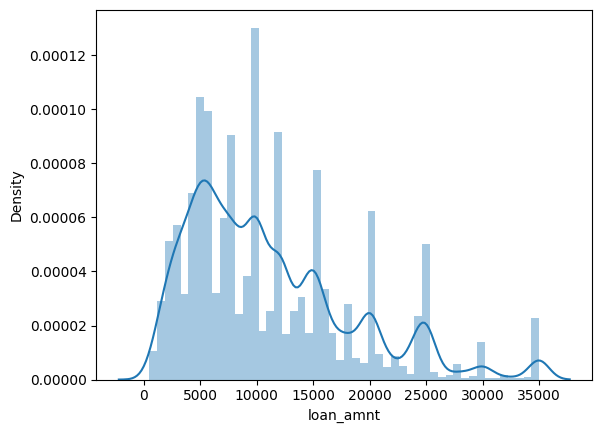

In [49]:
# loan amount: the median loan amount is around 10,000
sns.distplot(loan['loan_amnt'])
plt.show()

In [50]:
#Let's bin the loan amount variable into small, medium, high, very high to verify variables into discrete categories

def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_amount(x))

In [51]:
loan['loan_amnt'].value_counts()

loan_amnt
medium       19068
high          7147
low           6611
very high     2541
Name: count, dtype: int64

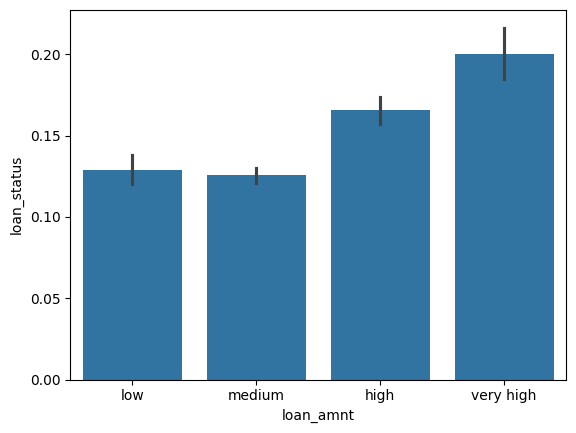

In [52]:
# lets compare default rates across loan amount type
plot_loan('loan_amnt')

In [53]:
# lets also convert interest rate to low, medium, high

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: int_rate(x))

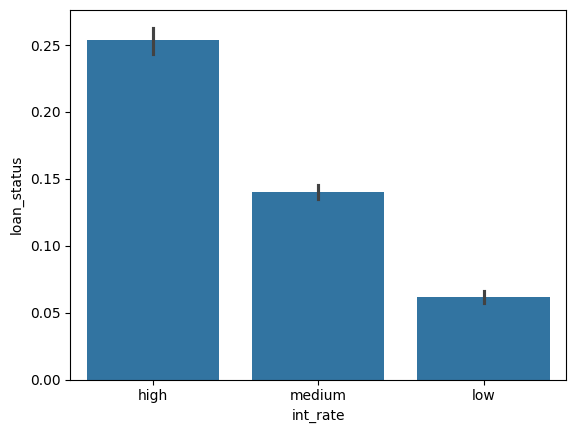

In [54]:
# comparing default rates across rates of interest
plot_loan('int_rate')

In [55]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti'] = loan['dti'].apply(lambda x: dti(x))

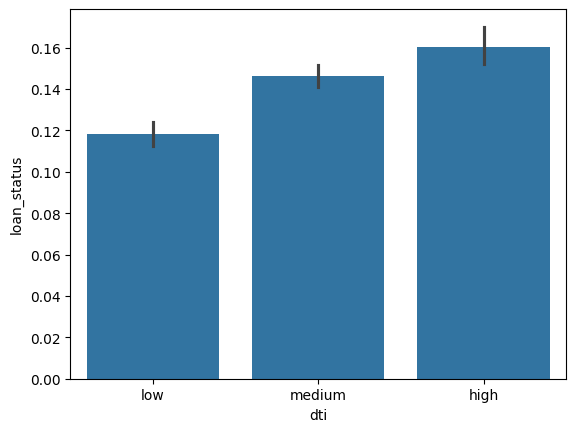

In [56]:
# comparing default rates across debt to income ratio
plot_loan('dti')

In [57]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan['installment'] = loan['installment'].apply(lambda x: installment(x))

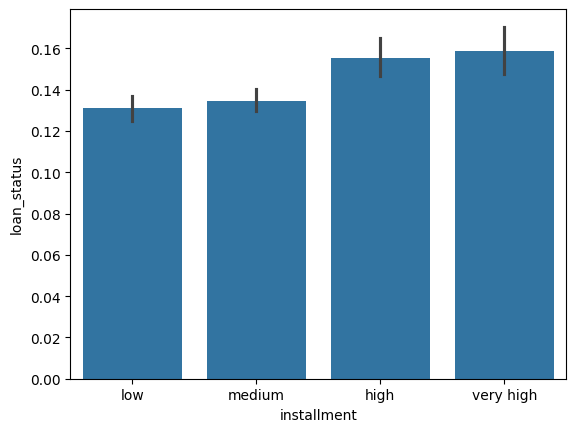

In [58]:
# comparing default rates across installment
plot_loan('installment')

In [59]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))

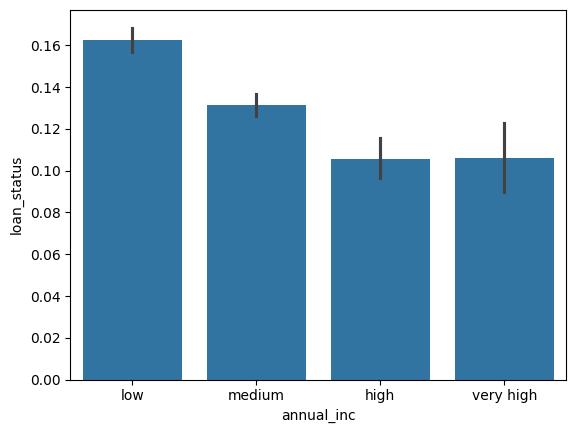

In [60]:
# annual income and default rate
# lower the annual income, higher the default rate
plot_loan('annual_inc')

## Bivariate Analysis

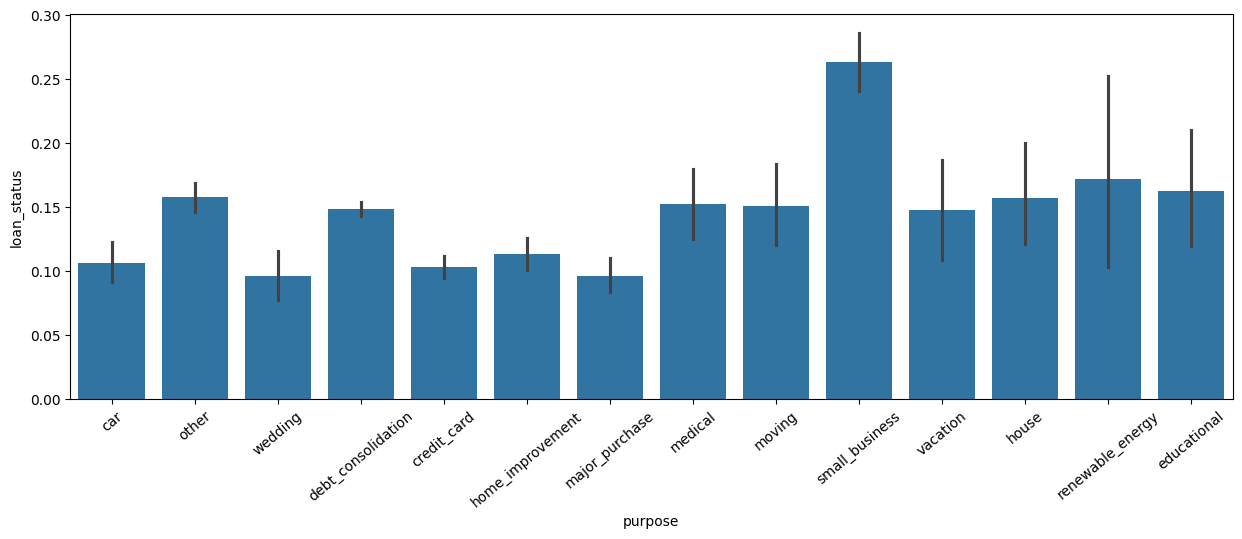

In [61]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(15, 5))
plt.xticks(rotation=40)
plot_loan('purpose')

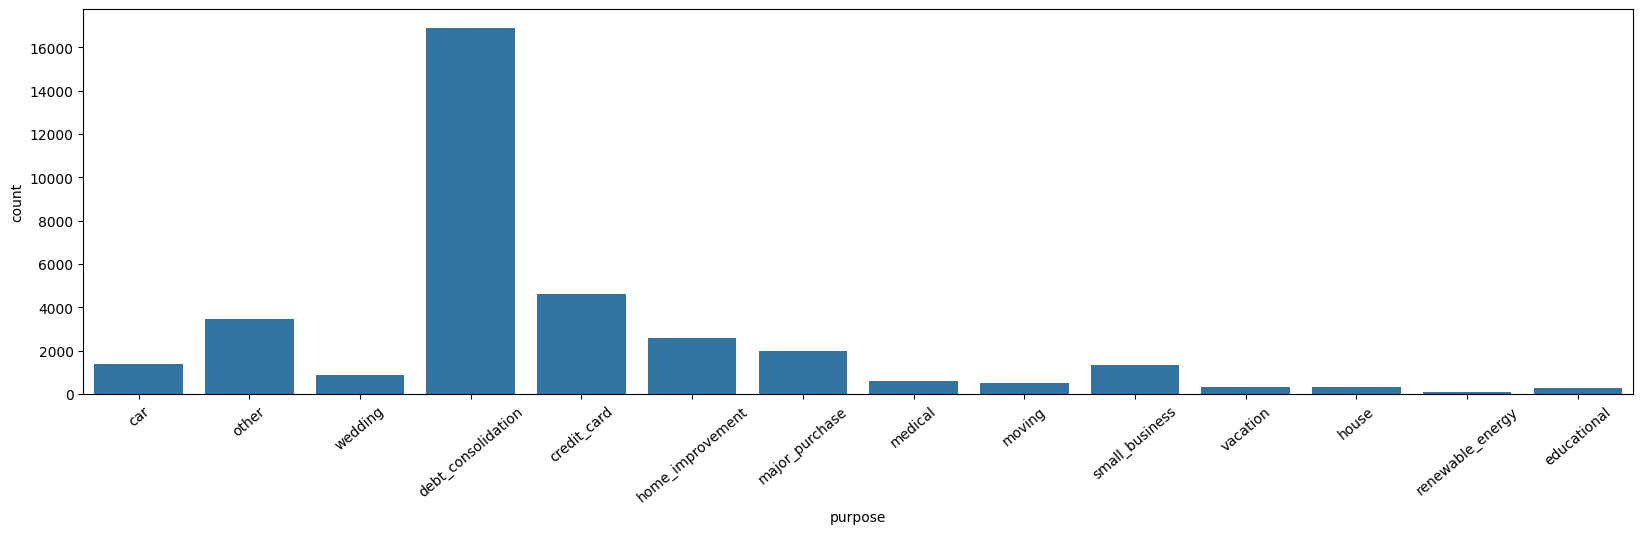

In [62]:
# lets first look at the number of loans for each type (purpose) of the loan
plt.figure(figsize=(20, 5))
plt.xticks(rotation=40)
sns.countplot(x='purpose', data=loan)
plt.show()

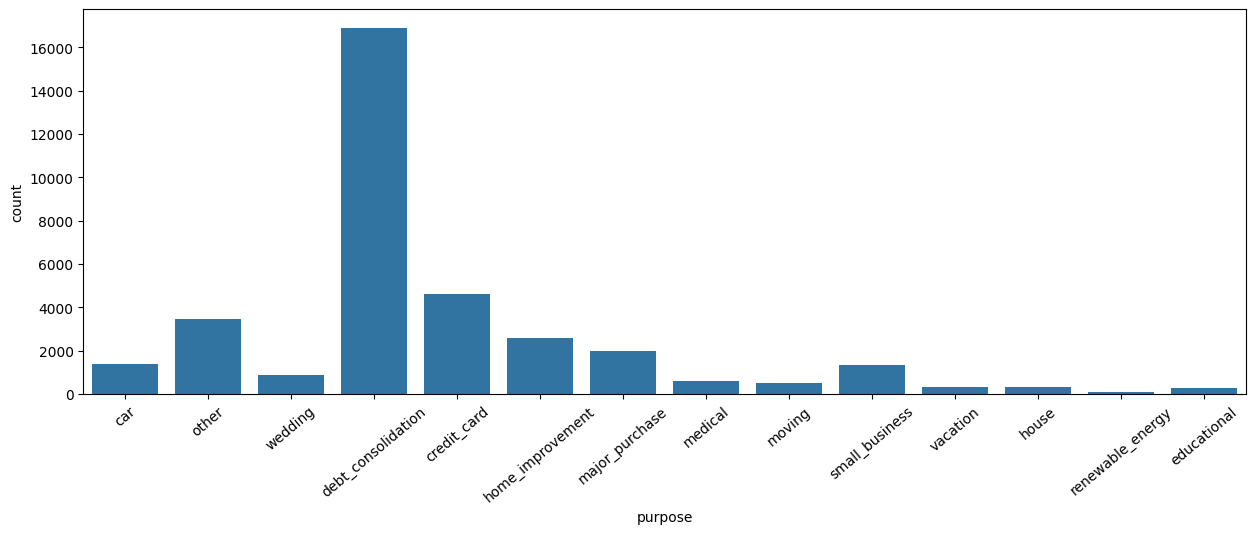

In [63]:
# lets first look at the number of loans for each type (purpose) of the loan
plt.figure(figsize=(15, 5))
plt.xticks(rotation=40)
sns.countplot(x='purpose', data=loan)
plt.show()

In [64]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan = loan[loan['purpose'].isin(main_purposes)]
loan['purpose'].value_counts()

purpose
debt_consolidation    16911
credit_card            4626
home_improvement       2614
major_purchase         1973
Name: count, dtype: int64

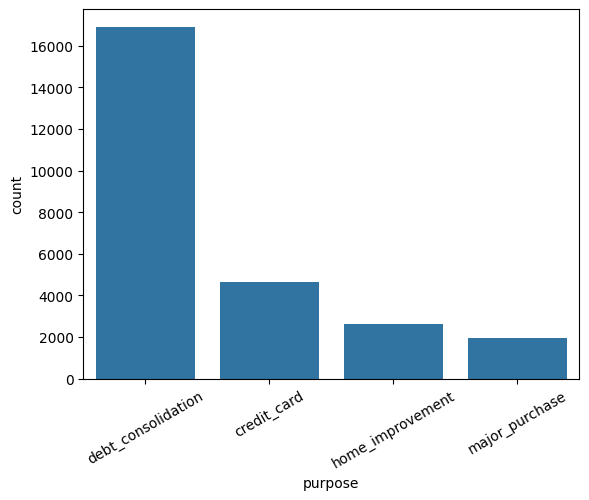

In [65]:
# plotting number of loans by purpose
sns.countplot(x=loan['purpose'])
plt.xticks(rotation=30)
plt.show()

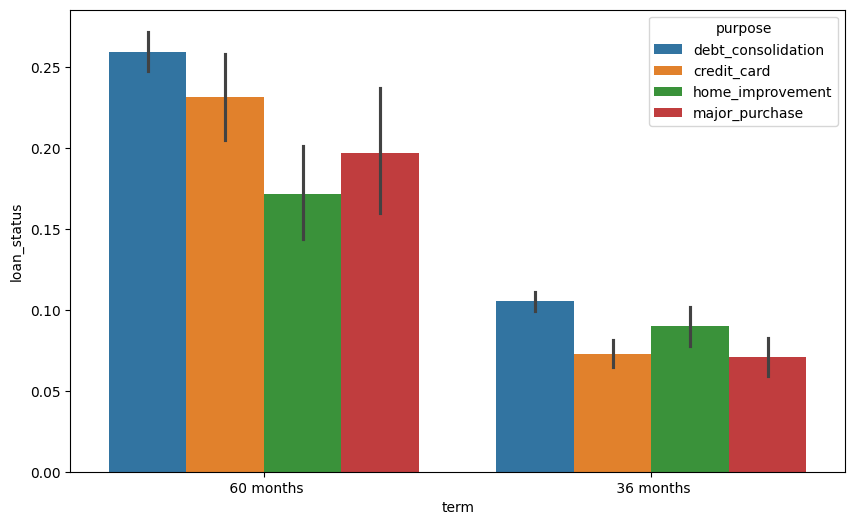

In [66]:
# let's now compare the default rates across two types of categorical variables

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan)
plt.show()

In [67]:
# lets write a function which takes a categorical variable and plots the default rate

def plot_seg(loan_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=loan_var, y='loan_status', hue='purpose', data=loan)
    plt.show()

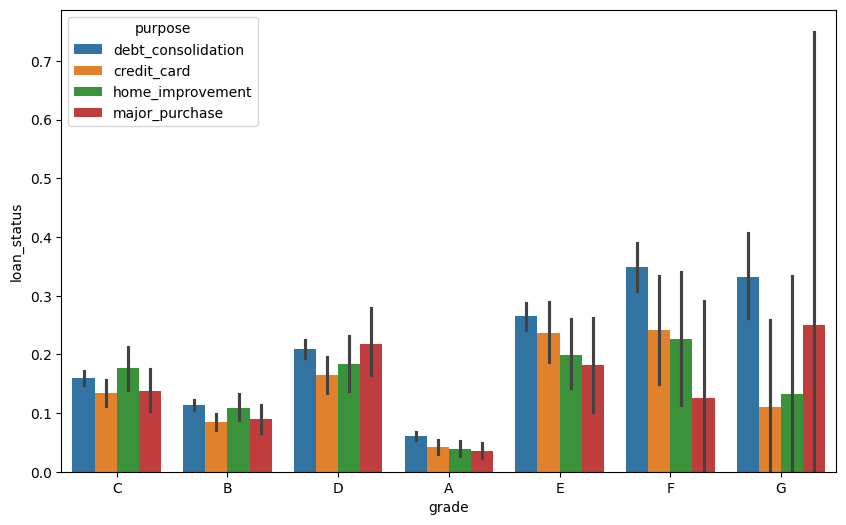

In [68]:
# grade of loan
plot_seg('grade')

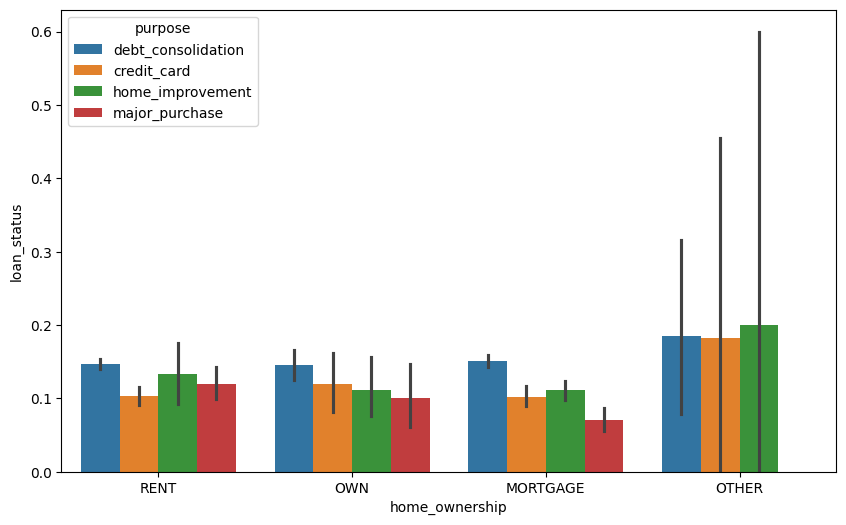

In [69]:
# home ownership
plot_seg('home_ownership')

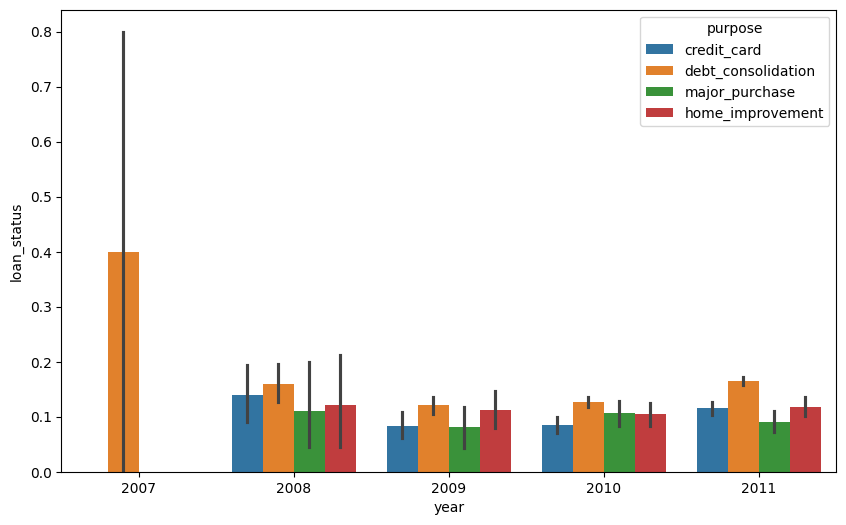

In [70]:
# year
plot_seg('year')

In [71]:
# binning the emp_length variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loan['emp_length'] = loan['emp_length'].apply(lambda x: emp_length(x))

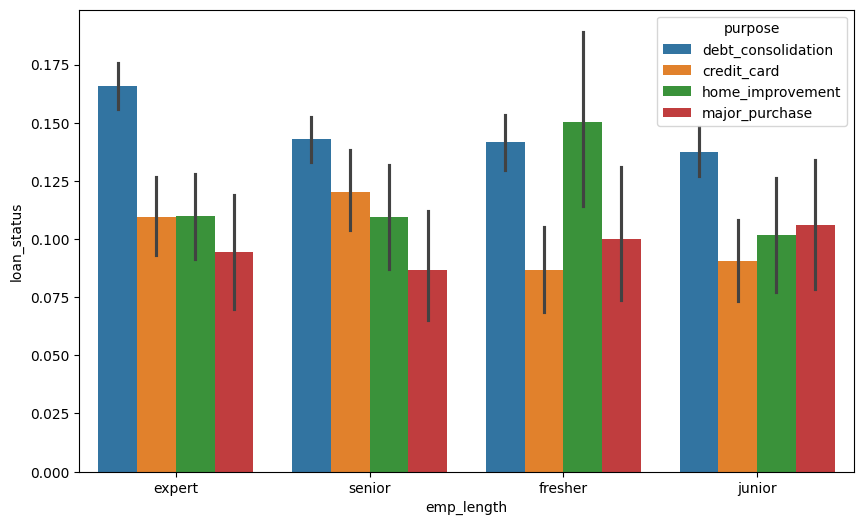

In [72]:
# emp_length
plot_seg('emp_length')

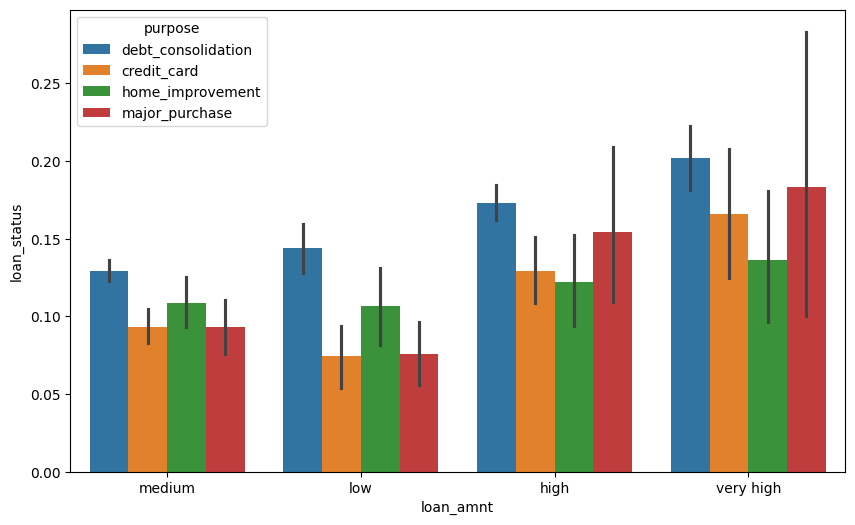

In [73]:
# loan_amnt: same trend across loan purposes
plot_seg('loan_amnt')

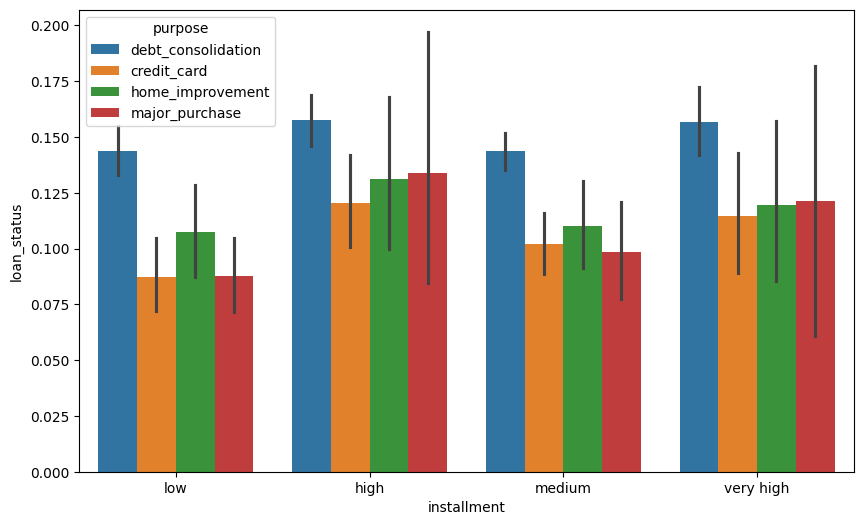

In [74]:
# installment
plot_seg('installment')

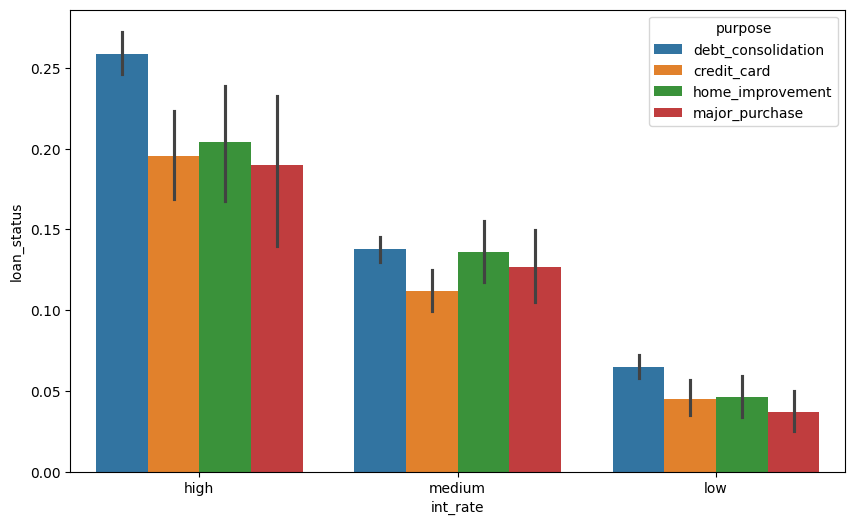

In [75]:
# interest rate
plot_seg('int_rate')

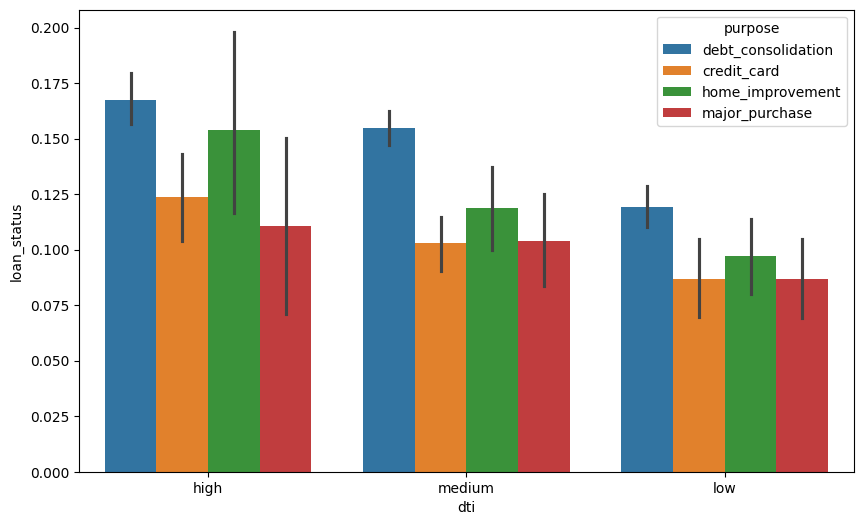

In [76]:
# debt to income ratio
plot_seg('dti')

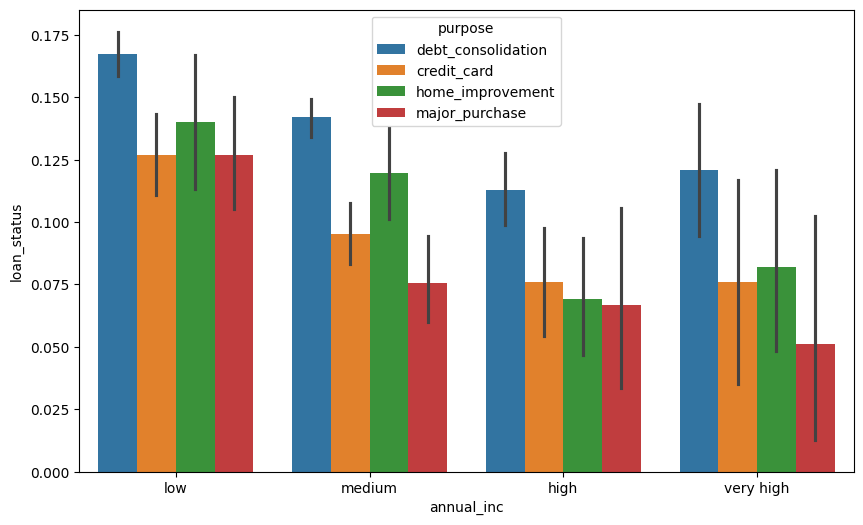

In [77]:
# annual income
plot_seg('annual_inc')

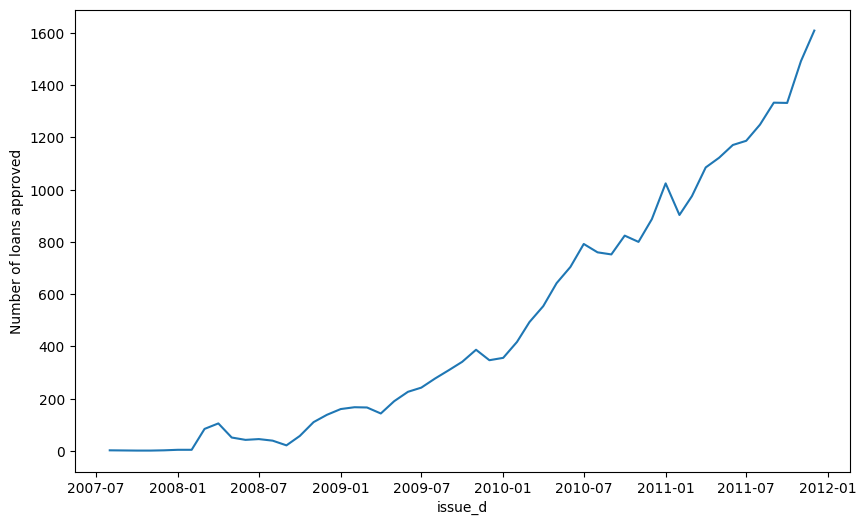

In [78]:
# Number of approved loans over the years
loan_s=loan.groupby('issue_d').count().reset_index().loc[:,['issue_d','loan_amnt']]
fig = plt.figure(figsize=(10, 6))
sns.lineplot(x='issue_d', y='loan_amnt', data=loan_s)
plt.ylabel('Number of loans approved')
plt.show()

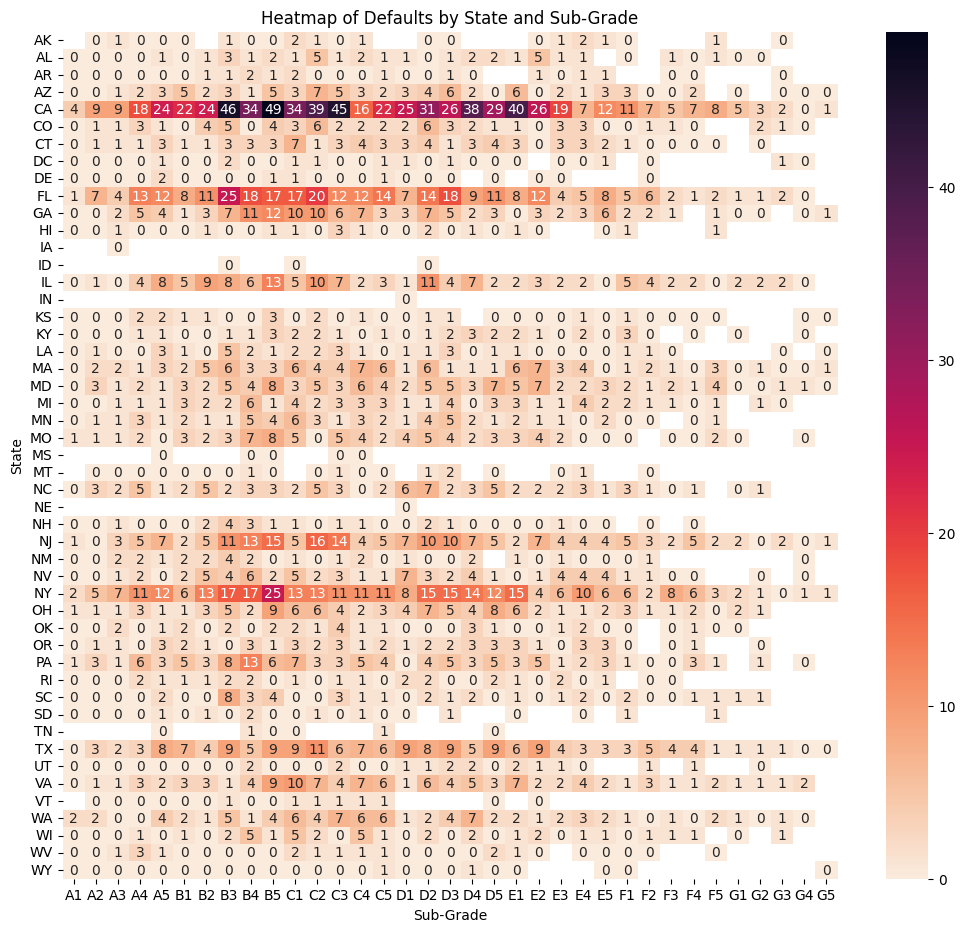

In [79]:
# Ploting Heatmap between 'Sub_grade' and 'Addr_state' for the loan dataset 
# Through this heatmap we can analyze which US state has high default rate in different sub_grades

# Creating a subset of required variables
loan_df=loan.loc[:,['loan_status','addr_state','sub_grade']]
# Initializing an empty dataframe and imputing columns using groupby on state and sub grade
dff_exp = pd.DataFrame()
dff_exp['State_sub'] = list(loan_df.groupby(['addr_state','sub_grade'])['loan_status'].agg(lambda x: sum(list(x))).index.values)
dff_exp['Count'] = list(loan_df.groupby(['addr_state','sub_grade'])['loan_status'].agg(lambda x: sum(list(x))).values)

# Separating the groupby list into state and subgrade
dff_exp['Addr_state'] = dff_exp['State_sub'].apply(lambda v: v[0])
dff_exp['Sub_grade'] = dff_exp['State_sub'].apply(lambda v: v[1])

# Using Pivot table for plotting a heatmap
loan_pvt = dff_exp.pivot(index="Addr_state", columns="Sub_grade", values="Count")

# Reversing the color scale
cmap = sns.cm.rocket_r

# Ploting the heatmap
plt.figure(figsize=(12.5, 11))
sns.heatmap(loan_pvt, cmap=cmap, annot=True, fmt='g')  # 'g' formatter minimizes white space around numbers
plt.title('Heatmap of Defaults by State and Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('State')
plt.show()

In [80]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26124 entries, 6 to 39680
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             26124 non-null  object        
 1   term                  26124 non-null  object        
 2   int_rate              26124 non-null  object        
 3   installment           26124 non-null  object        
 4   grade                 26124 non-null  object        
 5   sub_grade             26124 non-null  object        
 6   emp_title             26124 non-null  object        
 7   emp_length            26124 non-null  object        
 8   home_ownership        26124 non-null  object        
 9   annual_inc            26124 non-null  object        
 10  verification_status   26124 non-null  object        
 11  issue_d               26124 non-null  datetime64[ns]
 12  loan_status           26124 non-null  int64         
 13  desc                 

In [81]:
# Function for Calculating the difference between the maximum Default rate and minimum Default rate for each variable
def var_diff(loan_var):
    df=pd.DataFrame()
    # Imputing the Unique values of loan_var into the empty dataframe
    df[loan_var] = list(pd.unique(loan[loan_var]))
    # Calculating the default rate in percentage for each unique variable and imputing it as a column
    df['Default_rate'] = df[loan_var].apply(lambda v: round(loan[loan[loan_var]==v].loan_status.mean()*100,2))
    diff = round(df.describe().loc['max','Default_rate'] - df.describe().loc['min','Default_rate'],2)
    
    return diff

# Dropping variables which can'y be used for calculating the Default rate difference
loan_sub=loan.drop(['emp_title','issue_d','title','month','year','loan_status'],axis=1)
dff=pd.DataFrame()
dff['var_name'] = list(loan_sub.columns)
dff['DR_diff'] = dff['var_name'].apply(lambda v: var_diff(v))
dff = dff.sort_values(by = 'DR_diff', ascending=False ).reset_index().drop('index',axis=1)
dff

,var_name,DR_diff
0,desc,100.00
1,sub_grade,44.98
2,pub_rec_bankruptcies,37.05
3,addr_state,28.57
4,grade,26.72
5,int_rate,18.68
6,term,14.73
7,loan_amnt,7.31
8,annual_inc,5.94
9,purpose,5.21


In [82]:
# The driving variables for loan defaulter Identification
# Top 8 driving variable 
list(dff.var_name.values)[0:6]

['desc',
 'sub_grade',
 'pub_rec_bankruptcies',
 'addr_state',
 'grade',
 'int_rate']